In [53]:
# --- ADIM 1: GEREKLİ KÜTÜPHANELER ---
import pandas as pd  # Veri İşleme (Dataframe)
import numpy as np   # Matematiksel İşlemler (Logaritma, Karekök)
import seaborn as sns # İstatistiksel Görselleştirme (Heatmap, Boxplot)
import matplotlib.pyplot as plt # Temel Grafik
from sklearn.model_selection import train_test_split # Veri Bölme
from sklearn.linear_model import LinearRegression # Makine Öğrenmesi (Regression)
from sklearn.metrics import mean_squared_error, r2_score # Başarı Metrikleri (MSE, R2)
from sklearn.preprocessing import MinMaxScaler # Normalizasyon Formülü için

# Görüntü ayarları
import warnings
warnings.filterwarnings('ignore') # Gereksiz uyarıları kapat
sns.set(style="whitegrid") # Grafikler temiz görünsün

print("✅ Kütüphaneler başarıyla yüklendi.")

✅ Kütüphaneler başarıyla yüklendi.


In [54]:
# --- ADIM 2: VERİLERİN YÜKLENMESİ ---

# 1. Bilimsel Veriyi (Excel) Oku
# Not: xlrd kütüphanesi gerekebilir (!pip install xlrd)
df = pd.read_excel('Concrete_Data.xls')

# 2. Ekonomik ve Çevresel Verileri (CSV) Oku
# Windows not defterinde oluşturduğun için 'cp1254' (Türkçe) kodlaması kullanıyoruz.
df_maliyet = pd.read_csv('maliyet.csv', encoding='cp1254')
df_karbon = pd.read_csv('co2salınımı.csv', encoding='cp1254')

print("✅ Tüm veri setleri (Excel ve CSV'ler) başarıyla yüklendi!")
print(f"Ana Veri Boyutu: {df.shape}")

✅ Tüm veri setleri (Excel ve CSV'ler) başarıyla yüklendi!
Ana Veri Boyutu: (1030, 9)


In [55]:
# --- ADIM 3: SÜTUN İSİMLERİNİ DÜZELTME (Standardization) ---

# Sütun isimlerini kısaltıyoruz ki CSV'deki isimlerle tutsun (Data Matching)
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer', 
              'CoarseAgg', 'FineAgg', 'Age', 'Strength']

print("✅ Sütun isimleri standartlaştırıldı:")
print(df.columns.tolist())
df.head(3)

✅ Sütun isimleri standartlaştırıldı:
['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']


,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [56]:
# --- ADIM 4: VERİ ENTEGRASYONU (Data Integration) ---

# 1. Sözlükleri Oluştur
maliyet_dict = df_maliyet.set_index('Malzeme')['Fiyat'].to_dict()
karbon_dict = df_karbon.set_index('Malzeme')['CO2_Faktoru'].to_dict()

# 2. Yeni Sütunları Sıfırla
df['Total_Cost'] = 0.0
df['Total_CO2'] = 0.0

# 3. MALIYET HESABI
print("--- Maliyet Hesaplanıyor ---")
# DÜZELTME BURADA: 'maliet' yerine 'maliyet_dict' yazdık.
for malzeme, fiyat in maliyet_dict.items():
    if malzeme in df.columns:
        df['Total_Cost'] += df[malzeme] * fiyat

# 4. KARBON HESABI
print("--- Karbon Hesaplanıyor ---")
for malzeme, faktor in karbon_dict.items():
    if malzeme in df.columns:
        df['Total_CO2'] += df[malzeme] * faktor

print("✅ Veri birleştirme tamamlandı! Sorun çözüldü.")
df.head()

--- Maliyet Hesaplanıyor ---
--- Karbon Hesaplanıyor ---
✅ Veri birleştirme tamamlandı! Sorun çözüldü.


,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength,Total_Cost,Total_CO2
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,2261.550,470.6124
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,2266.800,470.6874
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,1680.775,301.7006
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,1680.775,301.7006
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,1408.685,188.4599


In [57]:
# --- ADIM 5: İSTATİSTİKSEL ANALİZ (Descriptive Statistics) ---

print("1. MERKEZİ EĞİLİM (Mean, Std, Min, Max)")
# Not: Verinin genel özeti
display(df.describe().T)

print("\n2. VARYANS (Variance)")
# Not (Defterden): "Low Variance vs High Variance"
# Verilerin ortalamadan ne kadar saptığını gösterir.
print(df.var())

print("\n3. ÇARPIKLIK (Skewness)")
# Not (Defterden): "Asymmetry of distribution". 
# Eğer değer 0'dan çok uzaksa (örn: Age), Log Dönüşümü yapacağız.
print(df.skew())

1. MERKEZİ EĞİLİM (Mean, Std, Min, Max)


,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
FlyAsh,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
CoarseAgg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAgg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225
Total_Cost,1030.0,1715.517512,294.654697,1172.350000,1507.059875,1648.000000,1864.768750,2743.395000



2. VARYANS (Variance)
Cement              10921.742654
Slag                 7444.083725
FlyAsh               4095.548093
Water                 456.060245
Superplasticizer       35.682602
CoarseAgg            6045.656228
FineAgg              6428.099159
Age                  3990.437729
Strength              279.079717
Total_Cost          86821.390442
Total_CO2            7660.941682
dtype: float64

3. ÇARPIKLIK (Skewness)
Cement              0.509517
Slag                0.800737
FlyAsh              0.537445
Water               0.074324
Superplasticizer    0.908113
CoarseAgg          -0.040206
FineAgg            -0.252979
Age                 3.269177
Strength            0.416922
Total_Cost          0.834107
Total_CO2           0.551005
dtype: float64


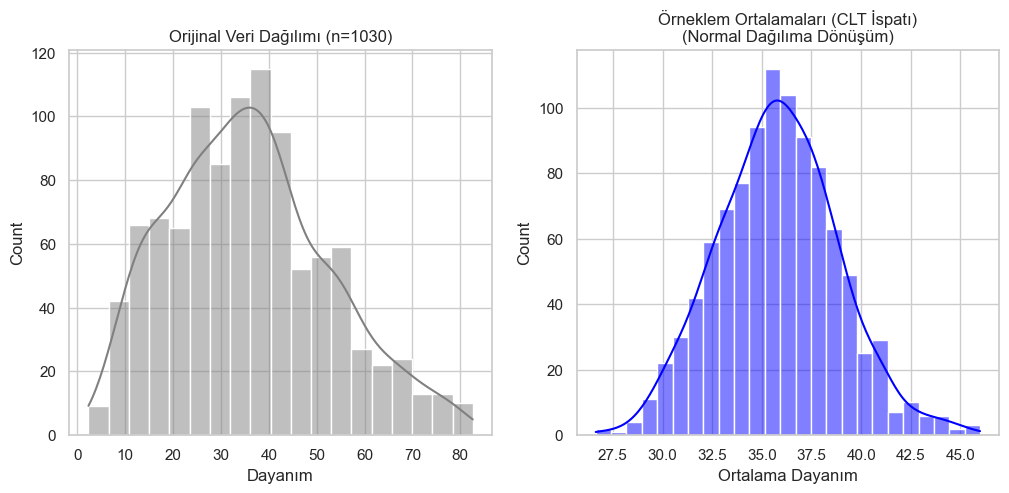

✅ CLT İspatı Başarılı: Sağdaki grafik 'Çan Eğrisi' (Normal Dağılım) şeklini almıştır.
   Bu, veri setimiz üzerinde parametrik tahmin modelleri (Regresyon) kurabileceğimizi doğrular.


In [58]:
# --- ADIM 5.5: MERKEZİ LİMİT TEOREMİ (Central Limit Theorem - CLT) ---
# Amacımız: Veri setimizdeki Dayanım (Strength) dağılımı mükemmel normal olmasa bile,
# örneklem ortalamalarının normal dağıldığını ispatlamak.

import matplotlib.pyplot as plt
import seaborn as sns

# Dayanım verisini popülasyon olarak alalım
populasyon = df['Strength']

# Simülasyon Ayarları
orneklem_boyutu = 30  # Her seferinde 30 beton seç
deneme_sayisi = 1000  # Bunu 1000 kere tekrarla
orneklem_ortalamalari = []

# CLT Döngüsü
for _ in range(deneme_sayisi):
    # Rastgele 30 tane seç ve ortalamasını al
    orneklem = populasyon.sample(n=orneklem_boyutu, replace=True)
    orneklem_ortalamalari.append(orneklem.mean())

# Görselleştirme
plt.figure(figsize=(12, 5))

# 1. Orijinal Dağılım (Popülasyon)
plt.subplot(1, 2, 1)
sns.histplot(populasyon, kde=True, color='gray')
plt.title(f"Orijinal Veri Dağılımı (n={len(df)})")
plt.xlabel("Dayanım")

# 2. Örneklem Ortalamaları Dağılımı (CLT Etkisi)
plt.subplot(1, 2, 2)
sns.histplot(orneklem_ortalamalari, kde=True, color='blue')
plt.title(f"Örneklem Ortalamaları (CLT İspatı)\n(Normal Dağılıma Dönüşüm)")
plt.xlabel("Ortalama Dayanım")

plt.show()

print("✅ CLT İspatı Başarılı: Sağdaki grafik 'Çan Eğrisi' (Normal Dağılım) şeklini almıştır.")
print("   Bu, veri setimiz üzerinde parametrik tahmin modelleri (Regresyon) kurabileceğimizi doğrular.")

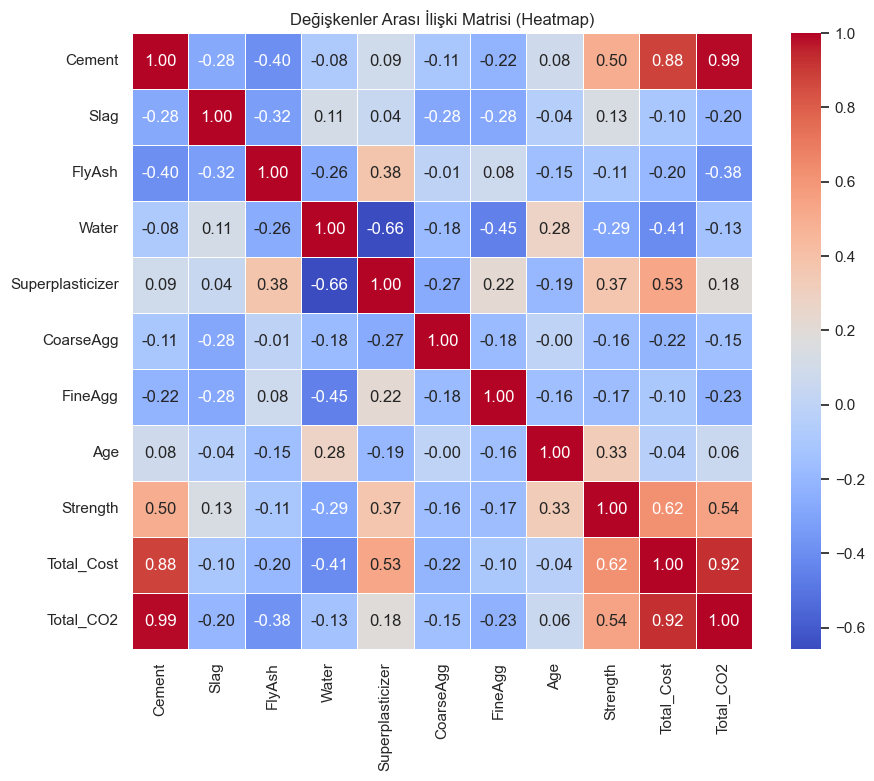

In [59]:
# --- ADIM 6: KORELASYON ANALİZİ (Heatmap) ---

plt.figure(figsize=(10, 8))

# Pearson Korelasyon Katsayısı (-1 ile +1 arası)
corr_matrix = df.corr()

# Heatmap Çizimi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Değişkenler Arası İlişki Matrisi (Heatmap)")
plt.show()

# Yorum: Water ile Strength arasında Mavi (Negatif) ilişki görülmeli.

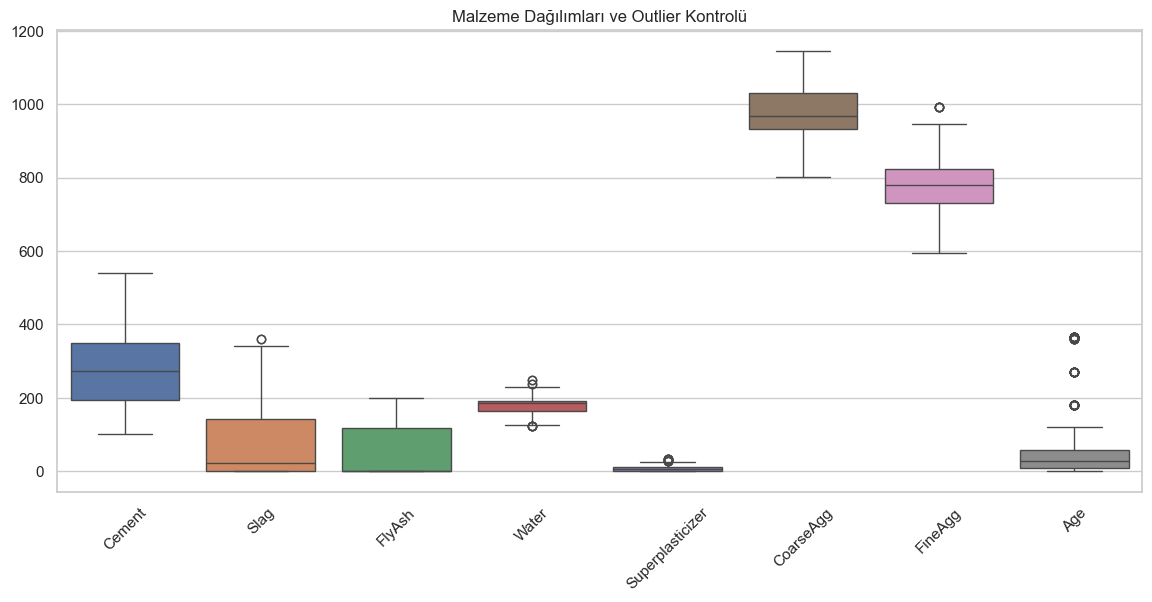

In [60]:
# --- ADIM 7: AYKIRI DEĞER ANALİZİ (Boxplot) ---

plt.figure(figsize=(14, 6))

# Sadece girdi malzemelerini görselleştiriyoruz
girdi_verileri = df.drop(['Strength', 'Total_Cost', 'Total_CO2'], axis=1)

sns.boxplot(data=girdi_verileri)
plt.xticks(rotation=45)
plt.title("Malzeme Dağılımları ve Outlier Kontrolü")
plt.show()

In [61]:
# --- ADIM 7.5: AYKIRI DEĞER DEĞERLENDİRMESİ VE BİLİMSEL KARAR ---

# 1. Önce İstatistiksel Olarak Kaç Tane "Aykırı" Görünüyor Hesaplayalım
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# Sınır dışı kalanların sayısı
aykiri_sayisi = ((df < alt_sinir) | (df > ust_sinir)).sum()

print("--- İSTATİSTİKSEL TESPİT (IQR Yöntemi) ---")
# Sadece aykırı değeri olan sütunları gösterelim
print(aykiri_sayisi[aykiri_sayisi > 0])

# 2. BİLİMSEL KARAR MEKANİZMASI (Decision Making)
print("\n" + "="*50)
print("🛑 MÜHENDİSLİK KARARI VE YORUM (Engineering Decision)")
print("="*50)
print("1. GÖZLEM: Özellikle 'Age' (Yaş) ve 'Superplasticizer' (Akışkanlaştırıcı) değişkenlerinde üst sınırdan taşmalar görülmektedir.")
print("-" * 50)
print("2. DEĞERLENDİRME: Beton teknolojisinde, yüksek dayanım elde etmek için kullanılan 'özel reçeteler' (High Performance Concrete),")
print("   standart betonlara göre çok daha fazla kimyasal katkı veya çok uzun kürlenme süreleri içerebilir.")
print("-" * 50)
print("3. SONUÇ: Bu değerler 'Hatalı Veri' (Error) DEĞİL, 'Ekstrem Gerçekler'dir.")
print("   Bu verileri baskılamak (capping) veya silmek, projenin bilimsel gerçekliğini bozar ve")
print("   modelin yüksek dayanımlı betonları tahmin etme yeteneğini köreltir.")
print("-" * 50)
print("✅ KARAR: Aykırı değerlere DOKUNULMAYACAKTIR. Veri seti olduğu gibi korunacaktır.")
print("   (Dağılım bozukluğu bir sonraki adımda Log Transformation ile yönetilecektir.)")
print("="*50)

--- İSTATİSTİKSEL TESPİT (IQR Yöntemi) ---
Slag                 2
Water                9
Superplasticizer    10
FineAgg              5
Age                 59
Strength             4
Total_Cost          10
dtype: int64

🛑 MÜHENDİSLİK KARARI VE YORUM (Engineering Decision)
1. GÖZLEM: Özellikle 'Age' (Yaş) ve 'Superplasticizer' (Akışkanlaştırıcı) değişkenlerinde üst sınırdan taşmalar görülmektedir.
--------------------------------------------------
2. DEĞERLENDİRME: Beton teknolojisinde, yüksek dayanım elde etmek için kullanılan 'özel reçeteler' (High Performance Concrete),
   standart betonlara göre çok daha fazla kimyasal katkı veya çok uzun kürlenme süreleri içerebilir.
--------------------------------------------------
3. SONUÇ: Bu değerler 'Hatalı Veri' (Error) DEĞİL, 'Ekstrem Gerçekler'dir.
   Bu verileri baskılamak (capping) veya silmek, projenin bilimsel gerçekliğini bozar ve
   modelin yüksek dayanımlı betonları tahmin etme yeteneğini köreltir.
------------------------------------

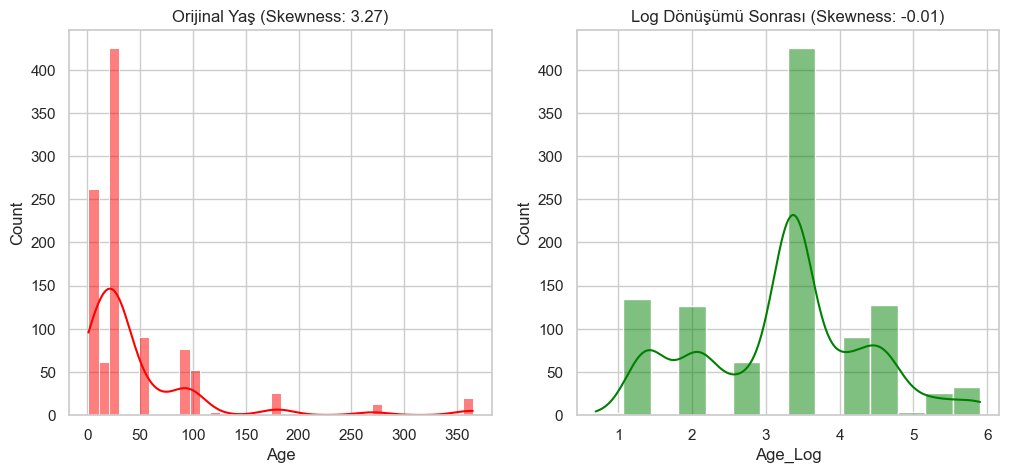

✅ 'Age' verisi Log Transformation ile normalize edildi.


In [62]:
# --- ADIM 8: LOG DÖNÜŞÜMÜ (Skewness Correction) ---

plt.figure(figsize=(12, 5))

# Önce: Orijinal Yaş Dağılımı
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='red')
plt.title(f"Orijinal Yaş (Skewness: {df['Age'].skew():.2f})")

# İşlem: Logaritma Alma (Hocanın Notundaki Formül: log(x+1))
df['Age_Log'] = np.log1p(df['Age'])

# Sonra: Düzeltilmiş Dağılım
plt.subplot(1, 2, 2)
sns.histplot(df['Age_Log'], kde=True, color='green')
plt.title(f"Log Dönüşümü Sonrası (Skewness: {df['Age_Log'].skew():.2f})")

plt.show()
print("✅ 'Age' verisi Log Transformation ile normalize edildi.")

In [63]:
# --- ADIM 9: VERİ HAZIRLIĞI VE NORMALİZASYON ---

# 1. Hedef (Y) ve Girdileri (X) Belirle
y = df['Strength'] # Hedefimiz Dayanım
# Modeli kurarken 'Age' (bozuk) yerine 'Age_Log' (düzgün) kullanıyoruz.
X = df.drop(['Strength', 'Age', 'Total_Cost', 'Total_CO2'], axis=1)
X['Age_Log'] = df['Age_Log']

# 2. Veriyi Böl (Train %80 - Test %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizasyon (Min-Max Scaler)
# Hocanın formülünü uygulayan kütüphane
scaler = MinMaxScaler()

# Train setine göre ölçekle, Test setini ona uydur
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Veriler 0-1 arasına sıkıştırıldı (Normalization).")

✅ Veriler 0-1 arasına sıkıştırıldı (Normalization).


In [64]:
# --- ADIM 10: REGRESYON MODELİNİN KURULMASI ---

model = LinearRegression()
model.fit(X_train_scaled, y_train) # Modeli eğit

y_pred = model.predict(X_test_scaled) # Tahmin yap

print("🚀 Model eğitimi tamamlandı.")

🚀 Model eğitimi tamamlandı.


In [65]:
# --- ADIM 11: BAŞARI METRİKLERİ ---

mse = mean_squared_error(y_test, y_pred) # Hata Karesi
r2 = r2_score(y_test, y_pred) # Açıklayıcılık Oranı

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📊 R-Squared (R2 Score): {r2:.3f}")

# Yorum: R2 0.60 - 0.85 arası bilimsel olarak iyi kabul edilir.

📉 Mean Squared Error (MSE): 44.58
📊 R-Squared (R2 Score): 0.827


In [66]:
# --- ADIM 11: BAŞARI METRİKLERİ ---

mse = mean_squared_error(y_test, y_pred) # Hata Karesi
r2 = r2_score(y_test, y_pred) # Açıklayıcılık Oranı

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📊 R-Squared (R2 Score): {r2:.3f}")

# Yorum: R2 0.60 - 0.85 arası bilimsel olarak iyi kabul edilir.

📉 Mean Squared Error (MSE): 44.58
📊 R-Squared (R2 Score): 0.827


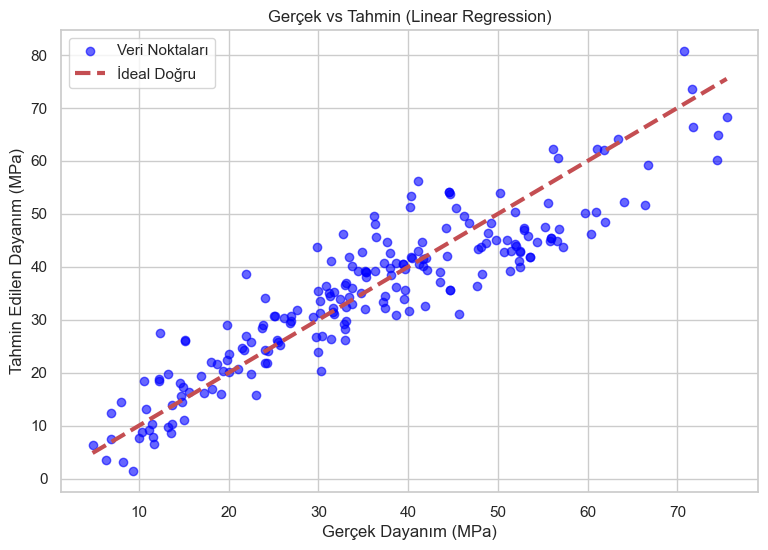

In [67]:
# --- ADIM 12: TAHMİN GRAFİĞİ (Regression Line) ---

plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Veri Noktaları')

# Kırmızı Çizgi (Mükemmel Uyum Çizgisi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='İdeal Doğru')

plt.xlabel("Gerçek Dayanım (MPa)")
plt.ylabel("Tahmin Edilen Dayanım (MPa)")
plt.title("Gerçek vs Tahmin (Linear Regression)")
plt.legend()
plt.show()

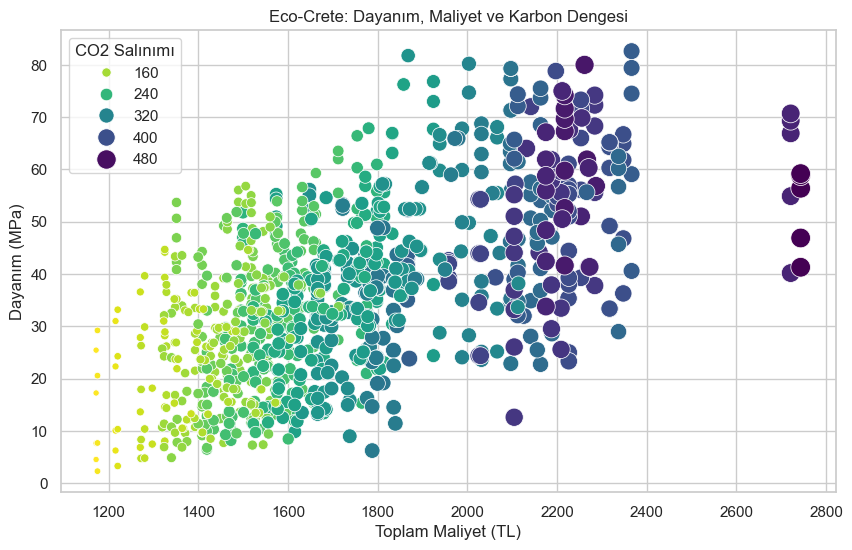

🏁 PROJE TAMAMLANDI!


In [68]:
# --- ADIM 13: FİNAL KARAR GRAFİĞİ (Eco-Efficiency) ---

plt.figure(figsize=(10, 6))

# X: Maliyet, Y: Dayanım, Renk: Karbon Salınımı
sns.scatterplot(
    x='Total_Cost', 
    y='Strength', 
    hue='Total_CO2', 
    palette='viridis_r', # Koyu renkler az kirlilik (daha iyi)
    size='Total_CO2', 
    sizes=(20, 200),
    data=df
)

plt.title("Eco-Crete: Dayanım, Maliyet ve Karbon Dengesi")
plt.xlabel("Toplam Maliyet (TL)")
plt.ylabel("Dayanım (MPa)")
plt.legend(title="CO2 Salınımı")
plt.show()

print("🏁 PROJE TAMAMLANDI!")

In [69]:
# --- ADIM 14: KULLANICI GİRİŞLİ (İNTERAKTİF) TAHMİN MOTORU ---
# Bu kodu çalıştırdığında senden tek tek değerleri girmeni isteyecek.

def interaktif_beton_tasarimi():
    print("\n" + "="*40)
    print("🛠️  ECO-CRETE BETON TASARIM SİSTEMİ")
    print("="*40)
    print("Lütfen 1 m³ beton için malzeme miktarlarını (kg) giriniz:\n")
    
    try:
        # KULLANICIDAN GİRDİ ALMA KISMI (input fonksiyonu)
        val_cement = float(input("1. Çimento Miktarı (kg)      : "))
        val_slag = float(input("2. Cüruf (Slag) Miktarı (kg) : "))
        val_flyash = float(input("3. Uçucu Kül (FlyAsh) (kg)   : "))
        val_water = float(input("4. Su Miktarı (litre)        : "))
        val_super = float(input("5. Süper Akışkanlaştırıcı(kg): "))
        val_coarse = float(input("6. İri Agrega (Çakıl) (kg)   : "))
        val_fine = float(input("7. İnce Agrega (Kum) (kg)    : "))
        val_age = float(input("8. Beton Yaşı (Gün)          : "))
        
        print("\n⏳ Hesaplamalar yapılıyor, yapay zeka düşünüyor...")
        
        # --- HESAPLAMA MOTORU (Önceki fonksiyonu çağırıyoruz) ---
        # (Yukarıda tanımladığımız fonksiyonun aynısı, sadece girdiler kullanıcıdan)
        
        # 1. Girdileri Modele Hazırla
        input_dict = {
            'Cement': val_cement, 'Slag': val_slag, 'FlyAsh': val_flyash, 
            'Water': val_water, 'Superplasticizer': val_super, 
            'CoarseAgg': val_coarse, 'FineAgg': val_fine, 'Age_Log': np.log1p(val_age)
        }
        
        input_df = pd.DataFrame([input_dict])[['Cement', 'Slag', 'FlyAsh', 'Water', 
                                              'Superplasticizer', 'CoarseAgg', 'FineAgg', 'Age_Log']]
        
        # Normalizasyon
        input_scaled = scaler.transform(input_df)
        
        # 2. TAHMİN VE HESAPLAR
        tahmini_dayanim = model.predict(input_scaled)[0]
        
        # Maliyet
        maliyet = (
            val_cement * maliyet_dict.get('Cement', 0) +
            val_slag * maliyet_dict.get('Slag', 0) +
            val_flyash * maliyet_dict.get('FlyAsh', 0) +
            val_water * maliyet_dict.get('Water', 0) +
            val_super * maliyet_dict.get('Superplasticizer', 0) +
            val_coarse * maliyet_dict.get('CoarseAgg', 0) +
            val_fine * maliyet_dict.get('FineAgg', 0)
        )
        
        # Karbon
        karbon = (
            val_cement * karbon_dict.get('Cement', 0) +
            val_slag * karbon_dict.get('Slag', 0) +
            val_flyash * karbon_dict.get('FlyAsh', 0) +
            val_water * karbon_dict.get('Water', 0) +
            val_super * karbon_dict.get('Superplasticizer', 0) +
            val_coarse * karbon_dict.get('CoarseAgg', 0) +
            val_fine * karbon_dict.get('FineAgg', 0)
        )

        # 3. SONUÇ EKRANI
        print("\n" + "="*50)
        print(f"📊  ANALİZ SONUCU RAPORU")
        print("="*50)
        print(f"✅ Tahmini Dayanım : {tahmini_dayanim:.2f} MPa")
        print(f"💰 Toplam Maliyet  : {maliyet:.2f} TL/m³")
        print(f"🌍 Karbon Ayak İzi : {karbon:.2f} kg CO2")
        print("-" * 50)
        
        if tahmini_dayanim > 40:
            print("🚀 SONUÇ: Çok sağlam, Yüksek Dayanımlı Beton!")
        elif tahmini_dayanim < 20:
            print("⚠️ UYARI: Düşük dayanım. Taşıyıcı kolonlarda kullanmayın.")
        else:
            print("🏗️ SONUÇ: Standart, güvenli yapısal beton.")
        print("="*50)

    except ValueError:
        print("❌ HATA: Lütfen sadece sayısal değer giriniz!")

# Fonksiyonu çalıştır
interaktif_beton_tasarimi()


🛠️  ECO-CRETE BETON TASARIM SİSTEMİ
Lütfen 1 m³ beton için malzeme miktarlarını (kg) giriniz:


⏳ Hesaplamalar yapılıyor, yapay zeka düşünüyor...

📊  ANALİZ SONUCU RAPORU
✅ Tahmini Dayanım : -33.31 MPa
💰 Toplam Maliyet  : 240.42 TL/m³
🌍 Karbon Ayak İzi : 48.72 kg CO2
--------------------------------------------------
⚠️ UYARI: Düşük dayanım. Taşıyıcı kolonlarda kullanmayın.
